
## Mini PJT

- `California Housing` 데이터셋을 이용하여 선형회귀 문제를 풀어봅니다.

(Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)


- 단순 선형회귀를 통해 각 Feature들을 이용하여 집값을 예측해봅니다.


- 20640개의 row, 8개의 column으로 구성되어 있습니다.


- 각 feature별 영향력을 알아보고, 테스트 해봅니다.

### 1. 데이터 및 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# California 데이터 불러오기 -> 여러가지 딕셔너리 확인
from sklearn.datasets import fetch_california_housing

x = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame=True)['target']
data = pd.concat([x,y], axis = 1)

display(x)
display(y)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Data Preprocessing

1. 결측치 확인

2. feature selection

In [5]:
# 결측치를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# 필요없는 column을 제거합니다.
# 모든 column 사용

### 3. EDA

- feature distribution

- target distribution



In [7]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


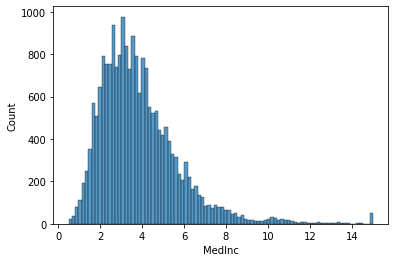

In [9]:
# feature distribution
sns.histplot(data = data, x = 'MedInc')

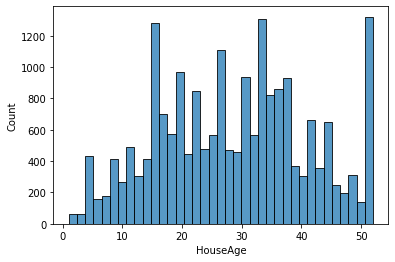

In [10]:
# feature distribution
# 오래된 집도 많다
sns.histplot(data = data, x = 'HouseAge')

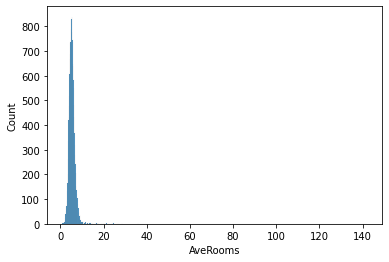

In [11]:
# feature distribution
# 건물 방 수 
sns.histplot(data = data, x = 'AveRooms')

In [14]:
data.columns.tolist().remove('Population')

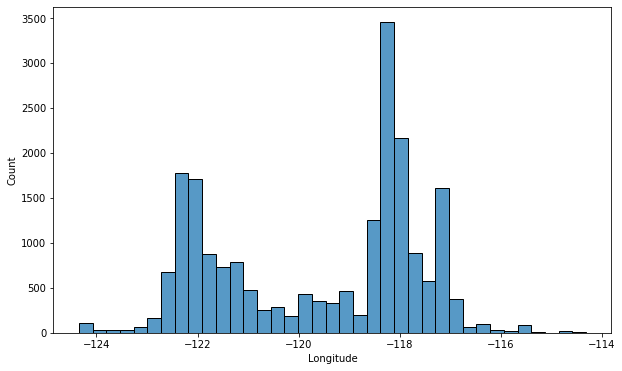

In [23]:
# feature distribution
plt.figure(figsize =(10,6))
#sns.histplot(data = data, x = "AveOccup")
sns.histplot(data = data, x = 'Longitude')
#sns.boxplot(data = data.loc[:,['MedInc','HouseAge','AveRooms','AveBedrms','AveOccup','Latitude','Longitude','MedHouseVal']])
#sns.boxplot(data = data.loc[:,['AveRooms','AveBedrms']])
#sns.boxplot(data = data.loc[:,['AveOccup']])

In [34]:
#data.loc[data.AveRooms > 100, :] # 1914,1979 row 제거
#data.loc[data.AveOccup > 200, :] # 3364, 13034, 16669, 19006 row 제거
# AveBedrms, Longitude column 제거
#data = data.drop(index = [1914, 1979, 3364, 13034, 16669, 19006])
#data = data.drop(columns = ['AveBedrms', 'Longitude'])
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


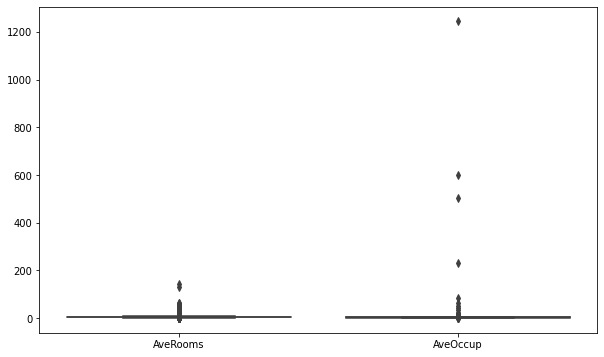

In [27]:
plt.figure(figsize =(10,6))
sns.boxplot(data = data.loc[:,['AveRooms',"AveOccup"]])

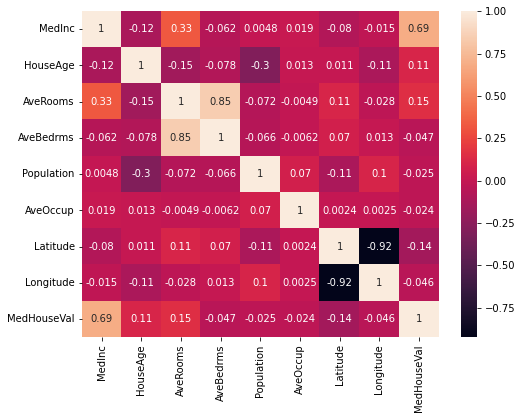

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True)

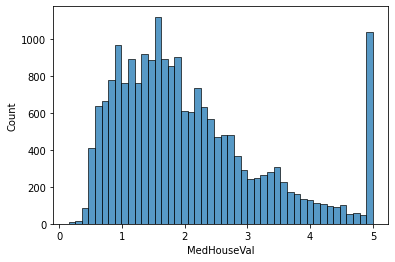

In [24]:
# target distribution
sns.histplot(data = data, x = "MedHouseVal")

### 4. Training

- train-test split

- Standardization

- Model training

- Hyper-parameter tuning

- Evaluation

In [38]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

# 트테트테 머신러닝에서 자주 쓰임 외워두기
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0xC0FFEE)

# 6 : 2 : 2 = train : validation : test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12384, 8) (4128, 8) (12384,) (4128,)


In [40]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train

array([[-1.17601944,  0.10850292, -0.45288606, ..., -0.00868   ,
         0.99834209, -1.31457603],
       [ 1.18715488,  0.42665141,  0.47835933, ..., -0.0655039 ,
         1.07323662, -1.47940183],
       [ 1.06546023,  1.38109688,  0.28551945, ..., -0.04575842,
         0.96557573, -1.43444934],
       ...,
       [-0.63090052, -0.84594255, -0.96876995, ...,  0.03905252,
        -0.89274496,  0.86312244],
       [ 1.20956132,  0.50618853, -0.02789518, ..., -0.02307157,
        -0.66338044,  0.66832831],
       [-1.32727596,  0.7447999 , -0.44326619, ..., -0.01722098,
         1.3915384 , -0.91999305]])

In [42]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression  # 1. Linear Regression
from sklearn.linear_model import Lasso             # 2. Lasso
from sklearn.linear_model import Ridge             # 3. Ridge
from xgboost.sklearn import XGBRegressor           # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

from sklearn.metrics import mean_squared_error

In [50]:
# training
# def train(model, X_train, y_train): <- 1~5쓸 필요없이 자동으로 돌려지는 코드
#    model.fit()
#    model.predict


reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)

mse_train2 = mean_squared_error(y_train, pred_train)
mse_val2 = mean_squared_error(y_val, pred_val)

mse_train3 = mean_squared_error(y_train, pred_train)
mse_val3 = mean_squared_error(y_val, pred_val)

mse_train4 = mean_squared_error(y_train, pred_train)
mse_val4 = mean_squared_error(y_val, pred_val)

mse_train5 = mean_squared_error(y_train, pred_train)
mse_val5 = mean_squared_error(y_val, pred_val)

print("1. Linear Regression\t, train/val = %.4f, %.4f" % (mse_train, mse_val))
print("2. Lasso\t\t, train/val = %.4f, %.4f" % (mse_train2, mse_val2))
print("3. Ridge\t\t, train/val = %.4f, %.4f" % (mse_train3, mse_val3))
print("4. XGBRegressor\t\t, train/val = %.4f, %.4f" % (mse_train4, mse_val4))
print("5. LGBMRegressor\t\t, train/val = %.4f, %.4f" % (mse_train5, mse_val5))

[12:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. Linear Regression	, train/val = 0.5336, 0.5241
2. Lasso		, train/val = 0.5336, 0.5241
3. Ridge		, train/val = 0.5336, 0.5241
4. XGBRegressor		, train/val = 0.5336, 0.5241
5. LGBMRegressor		, train/val = 0.5336, 0.5241


In [56]:
# Hyper-parameter tuning
# 1. Human Search : 직접 튜닝하는 것 
# 2. GridsearchCV : 그리드별로 주어진 hp 조합 모두 돌려보는 방식 
# 3. Bayesian Optimization(hyperopt, optuna,...) : hyper_parameter 최적화하는 베이지안 방식 사용

# GridSearchCV 
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [3, 4, 5], # 3
    "learning_rate" : [0.1, 0.01], # 2
    "n_estimators" : [50, 100] # 2
} # 3x3x2 = 12

# verbose = 2 2로 해야 자세히 볼 수 있다. 
gcv = GridSearchCV(reg5, param_grid, scoring = 'neg_mean_squared_error', verbose = 1)
gcv.fit(X_train, y_train)
#print(gcv.cv_results_)
print(gcv.best_estimator_)
print(gcv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LGBMRegressor(max_depth=5)
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


### 5. Test(Prediction)

In [51]:
# prediction!
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [53]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.5028
---------- Lasso ---------
MSE in training: 1.3254
---------- Ridge ---------
MSE in training: 0.5028
---------- XGBoost ---------
MSE in training: 0.2658
---------- LightGBM ---------
MSE in training: 0.2151
